# Pip Install Libraries for Metric


In [1]:
!pip install lifelines

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.0/425.0 kB 18.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=697d007504c1751d1a2d4c2b15f9e9b33d70b464296f198c89bf9ca738a3021d
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: narwhals
    Found existing installation: narwhals 1.14.2
    Uninstalling narwhals-1.14.2:
      Successfully uninstalled narwhals-1.14.2


# Project Overview

This project aims to predict survival outcomes for patients undergoing allogeneic Hematopoietic Cell Transplantation (HCT). The goal is to create models that are both accurate and fair, reducing disparities in predictions across different racial and socioeconomic groups. By doing this, we can help doctors make better decisions and give every patient an equal chance of a successful outcome.

Roadmap & Steps
# 1. Exploratory Data Analysis (EDA)

Understand the dataset, feature distributions, and patterns.

Identify missing values, outliers, and key relationships between features and survival outcomes.

Visualize important trends in patient demographics, HLA matches, comorbidities, and transplant conditions.

# 3. Categorical Encoding with Word2Vec

Convert categorical features into dense vector representations using Word2Vec.

Capture relationships between categorical values that standard one-hot encoding might miss.

Expand embeddings into separate columns for modeling.

# 4. Target Transformation (Nelson-Aalen Fitter)

Transform survival times using the Nelson-Aalen cumulative hazard method.

Create a continuous risk score as the target variable for regression models.

# 5. Modeling

Train multiple gradient boosting models: LightGBM, XGBoost, and CatBoost.

Tune hyperparameters to optimize model performance on the training set.

Evaluate predictions using RMSE and MSE to check accuracy.

# 6. Ensembling

Combine predictions from all models by averaging.

Reduce overfitting and improve robustness, ensuring better generalization on unseen test data.

In [2]:
import pandas as pd


In [3]:
train = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/train.csv', index_col='ID')
test = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/test.csv', index_col='ID')


In [4]:
print(train)

                                               dri_score psych_disturb  \
ID                                                                       
0                         N/A - non-malignant indication            No   
1                                           Intermediate            No   
2                         N/A - non-malignant indication            No   
3                                                   High            No   
4                                                   High            No   
...                                                  ...           ...   
28795  Intermediate - TED AML case <missing cytogenetics           NaN   
28796                                               High            No   
28797                                   TBD cytogenetics           NaN   
28798                     N/A - non-malignant indication            No   
28799                                    N/A - pediatric            No   

         cyto_score diabetes  hla_mat

# Dataset
dri_score – Disease Risk Index; categorizes patient risk based on the underlying disease.

psych_disturb – Indicates presence of psychiatric disorders (Yes/No).

cyto_score – Cytogenetic risk score; evaluates chromosomal abnormalities.

diabetes – Indicates whether the patient has diabetes (Yes/No).

hla_match_c_high – High-resolution HLA-C match score between donor and recipient.

hla_high_res_8 – High-resolution HLA score across 8 key loci.

hla_low_res_6 – Low-resolution HLA typing score across 6 loci.

hla_high_res_6 – High-resolution HLA score across 6 loci.

hla_high_res_10 – High-resolution HLA score across 10 loci.

hla_match_dqb1_high – High-resolution HLA-DQB1 match score.

hla_nmdp_6 – HLA match score based on 6 loci according to NMDP guidelines.

hla_match_c_low – Low-resolution HLA-C match score.

hla_match_drb1_low – Low-resolution HLA-DRB1 match score.

hla_match_dqb1_low – Low-resolution HLA-DQB1 match score.

hla_high_res_sum – Sum of all high-resolution HLA scores.

hla_high_res_avg – Average of high-resolution HLA scores.

hla_high_low_diff – Difference between high- and low-resolution HLA scores.

hla_high_low_ratio – Ratio of high- to low-resolution HLA scores.

hla_match_total – Total HLA match score across all loci.

hla_match_count – Number of HLA loci matched.

hla_match_std – Standard deviation of HLA match scores.

hla_high_res_log – Log-transformed high-resolution HLA score (for normalization).

hla_high_res_squared – Squared high-resolution HLA score (for feature engineering).

tbi_status – Total body irradiation received during conditioning.

arrhythmia – Presence of heart rhythm disorder (Yes/No).

graft_type – Type of stem cell graft received (Bone marrow, Peripheral blood, Cord blood).

tce_div_match – T-cell epitope permissiveness of HLA mismatch.

donor_related – Indicates if donor is related or unrelated.

melphalan_dose – Dose of Melphalan chemotherapy administered.

cardiac – Presence of cardiac disease (Yes/No).

pulm_moderate – Presence of moderate pulmonary disease (Yes/No).

hla_low_res_8 – Low-resolution HLA score across 8 loci.

hla_low_res_10 – Low-resolution HLA score across 10 loci.

hla_match_drb1_high – High-resolution HLA-DRB1 match score.

hla_match_dqb1_low – Low-resolution HLA-DQB1 match score.

hla_nmdp_6 – (Repeated) HLA match score using NMDP 6-loci method.

hla_low_res_6 – (Repeated) Low-resolution HLA score across 6 loci.

hla_high_res_6 – (Repeated) High-resolution HLA score across 6 loci.

hla_high_res_8 – (Repeated) High-resolution HLA score across 8 loci.

hla_high_res_10 – (Repeated) High-resolution HLA score across 10 loci.

hla_match_c_low – (Repeated) Low-resolution HLA-C match score.

hla_match_drb1_low – (Repeated) Low-resolution HLA-DRB1 match score.

hla_match_dqb1_high – (Repeated) High-resolution HLA-DQB1 match score.

hla_high_res_sum – (Repeated) Sum of all high-resolution HLA scores.

hla_high_res_avg – (Repeated) Average of high-resolution HLA scores.

hla_high_low_diff – (Repeated) Difference between high- and low-resolution HLA scores.

hla_high_low_ratio – (Repeated) Ratio of high- to low-resolution HLA scores.

hla_match_total – (Repeated) Total HLA match score.

hla_match_count – (Repeated) Number of matched HLA loci.

hla_match_std – (Repeated) Standard deviation of HLA match scores.

hla_high_res_log – (Repeated) Log-transformed HLA score.

hla_high_res_squared – (Repeated) Squared high-resolution HLA score.

efs – Event-free survival indicator (1 = event occurred, 0 = censored).

efs_time – Time until event or censoring.

dri_score_detail – Detailed disease risk info (e.g., pediatric vs non-malignant).

psych_disturb_detail – Additional notes on psychiatric status.

cyto_score_detail – Detailed cytogenetic information.

graft_type_detail – Additional info on stem cell source or processing.

donor_notes – Notes about donor match, relatedness, or special conditions.

# EDA

✅ Dataset Loaded Successfully
Dataset Shape: (28800, 59)

Columns in Dataset:
 ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'h

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
ID,,,,,,,,,,,,,,,,,,,,,
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223



Columns with Missing Values:
                         Missing Values  Percentage (%)
tce_match                        18996       65.958333
mrd_hct                          16597       57.628472
cyto_score_detail                11923       41.399306
tce_div_match                    11396       39.569444
tce_imm_match                    11133       38.656250
cyto_score                        8068       28.013889
hla_high_res_10                   7163       24.871528
hla_high_res_8                    5829       20.239583
hla_high_res_6                    5284       18.347222
hla_match_dqb1_high               5199       18.052083
hla_low_res_10                    5064       17.583333
conditioning_intensity            4789       16.628472
hla_match_c_high                  4620       16.041667
hla_match_a_high                  4301       14.934028
hla_nmdp_6                        4197       14.572917
hla_match_dqb1_low                4194       14.562500
hla_match_b_high                  

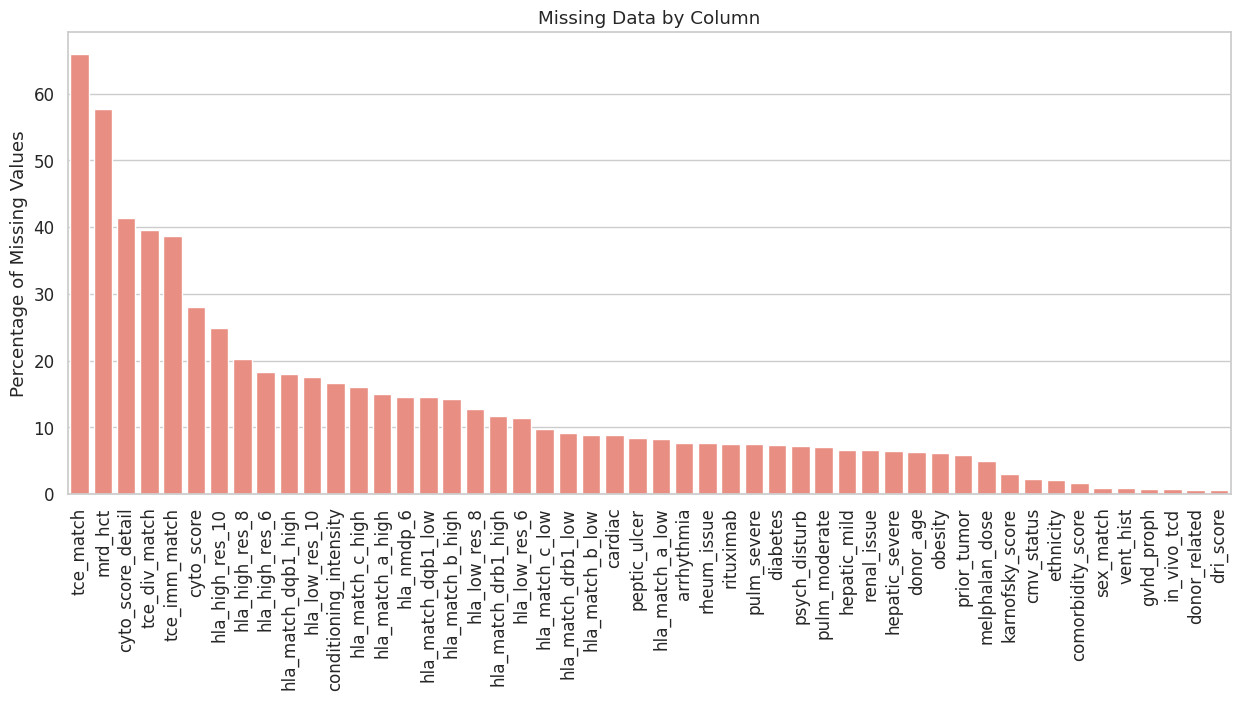


Numeric Columns (24): ['hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6', 'hla_high_res_6', 'hla_high_res_10', 'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'year_hct', 'hla_match_a_high', 'donor_age', 'hla_match_b_low', 'age_at_hct', 'hla_match_a_low', 'hla_match_b_high', 'comorbidity_score', 'karnofsky_score', 'hla_low_res_8', 'hla_match_drb1_high', 'hla_low_res_10', 'efs', 'efs_time']
Categorical Columns (35): ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moder

,efs,efs_time
count,28800.000000,28800.000000
mean,0.539306,23.237678
std,0.498461,24.799748
min,0.000000,0.333000
25%,0.000000,5.619750
50%,1.000000,9.796500
75%,1.000000,35.100000
max,1.000000,156.819000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


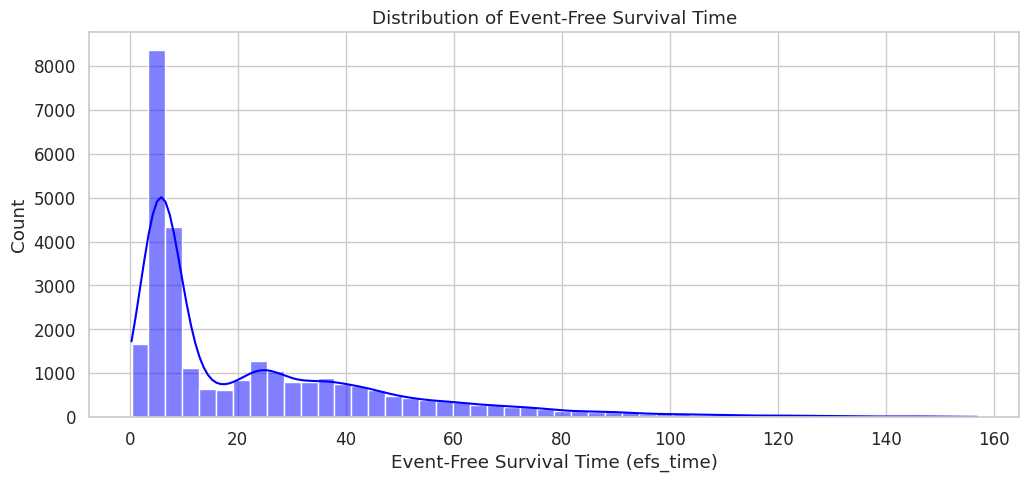

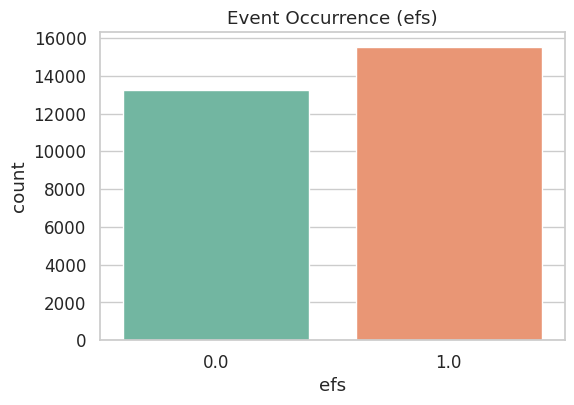


Number of HLA Features: 17


,count,mean,std,min,25%,50%,75%,max
hla_match_c_high,24180.0,1.764516,0.431941,0.0,2.0,2.0,2.0,2.0
hla_high_res_8,22971.0,6.876801,1.564313,2.0,6.0,8.0,8.0,8.0
hla_low_res_6,25530.0,5.143322,1.207757,2.0,4.0,6.0,6.0,6.0
hla_high_res_6,23516.0,5.109202,1.214162,0.0,4.0,6.0,6.0,6.0
hla_high_res_10,21637.0,8.617230,1.905125,3.0,7.0,10.0,10.0,10.0
hla_match_dqb1_high,23601.0,1.736876,0.447687,0.0,1.0,2.0,2.0,2.0
hla_nmdp_6,24603.0,5.160346,1.203240,2.0,4.0,6.0,6.0,6.0
hla_match_c_low,26000.0,1.757808,0.435453,0.0,2.0,2.0,2.0,2.0
hla_match_drb1_low,26157.0,1.715296,0.451282,1.0,1.0,2.0,2.0,2.0
hla_match_dqb1_low,24606.0,1.773795,0.427130,0.0,2.0,2.0,2.0,2.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


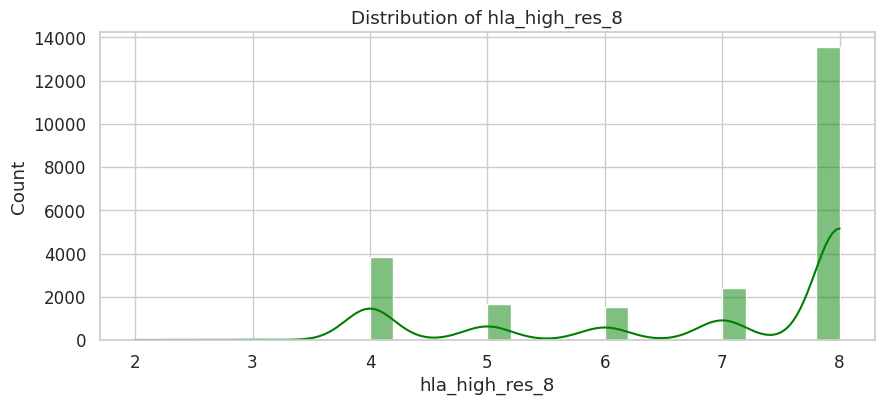

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


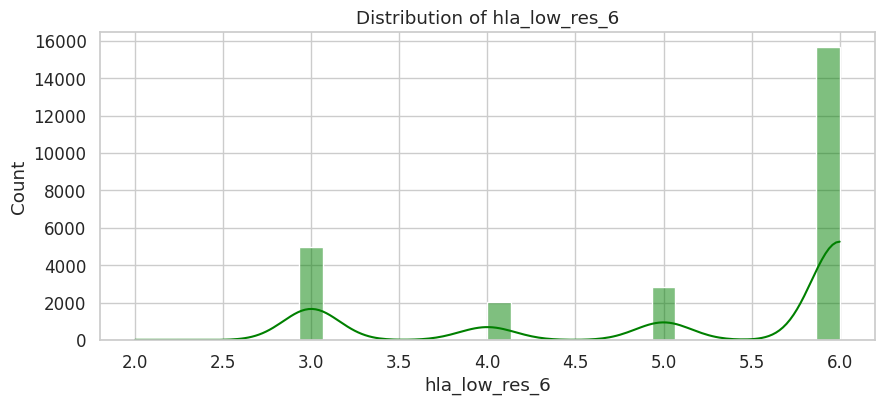

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


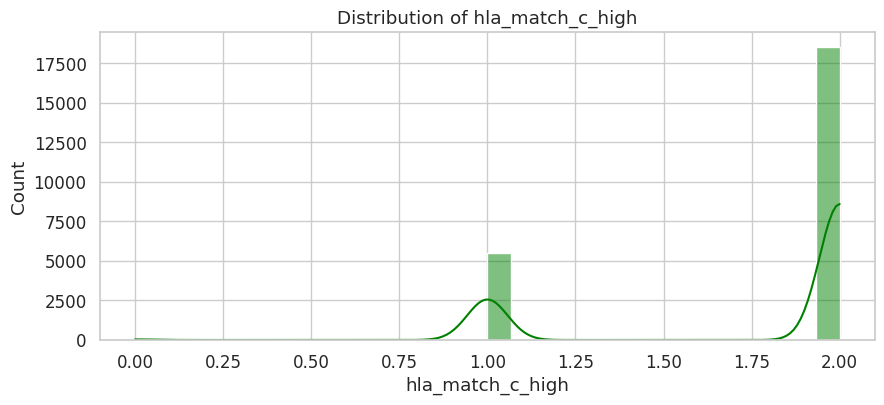


Categorical Features Summary:


,count,unique,top,freq
dri_score,28646,11,Intermediate,10436
psych_disturb,26738,3,No,23005
cyto_score,20732,7,Poor,8802
diabetes,26681,3,No,22201
tbi_status,28800,8,No TBI,18861
arrhythmia,26598,3,No,25203
graft_type,28800,2,Peripheral blood,20546
vent_hist,28541,2,No,27721
renal_issue,26885,3,No,26548
pulm_severe,26665,3,No,24779


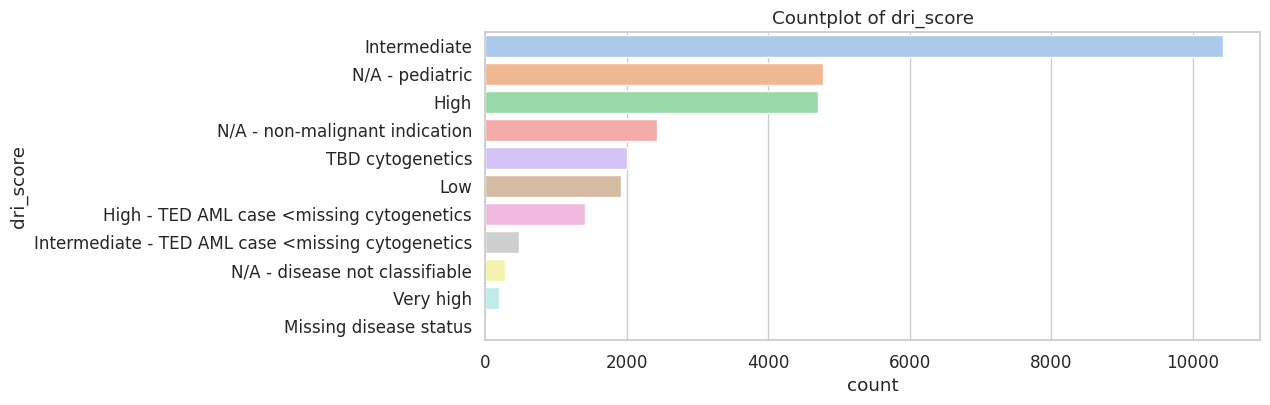

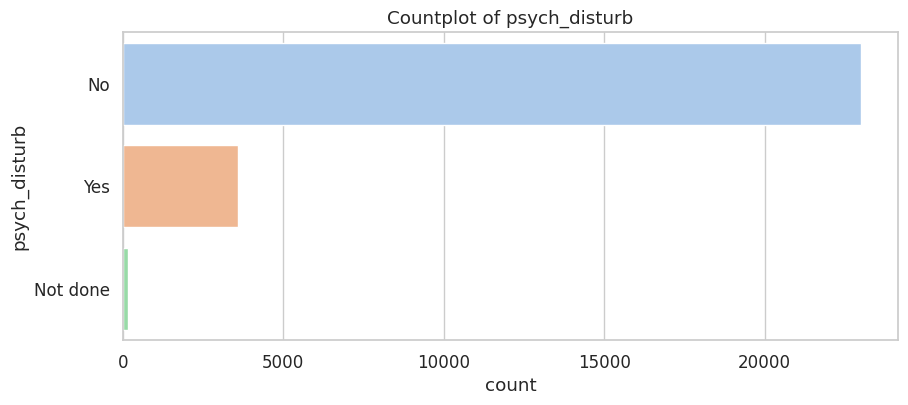

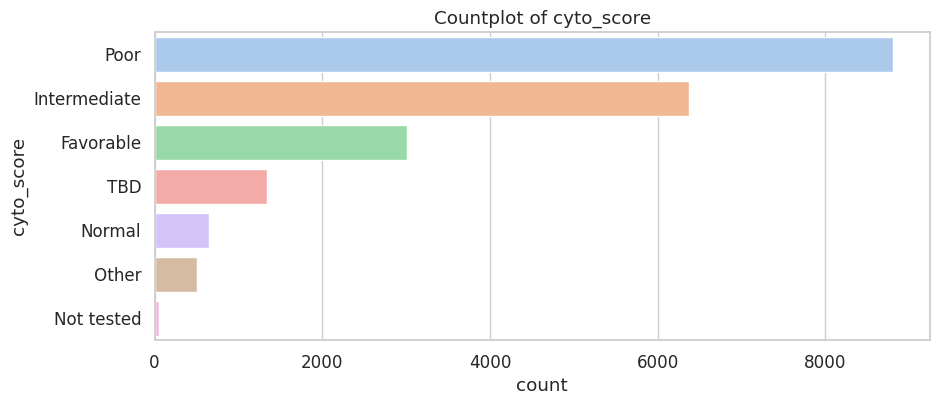

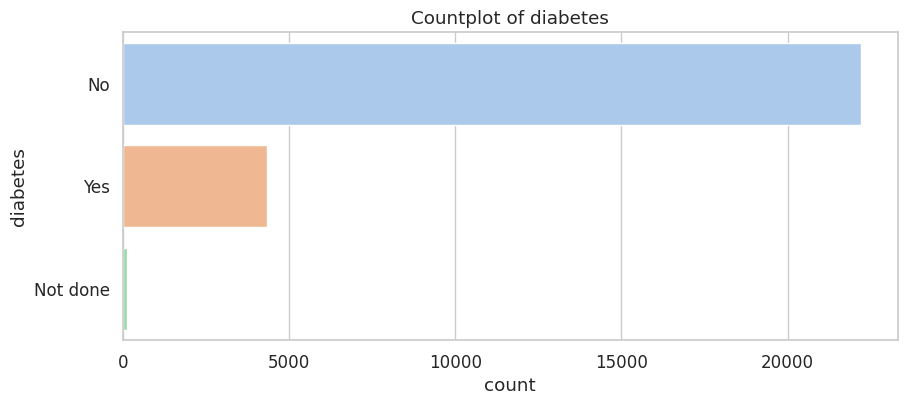

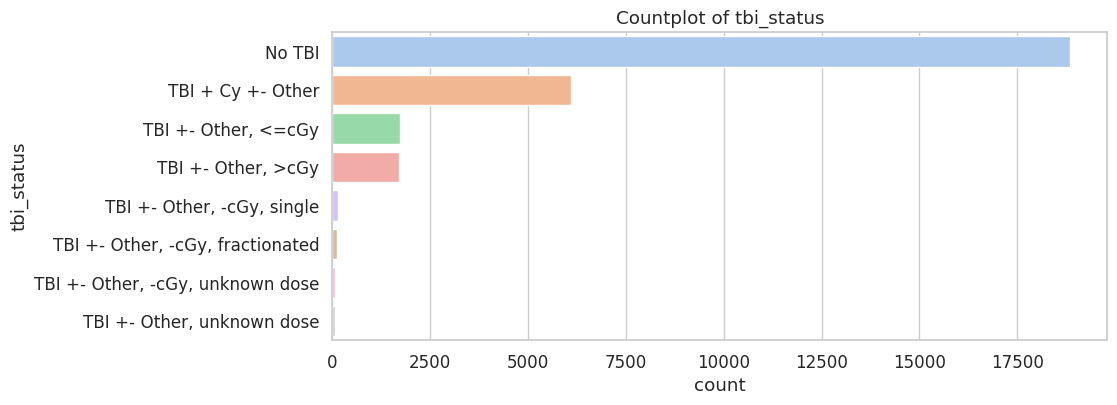

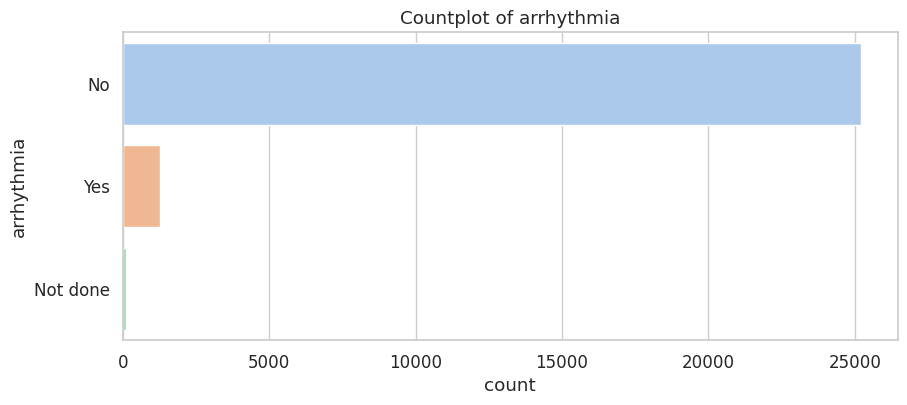

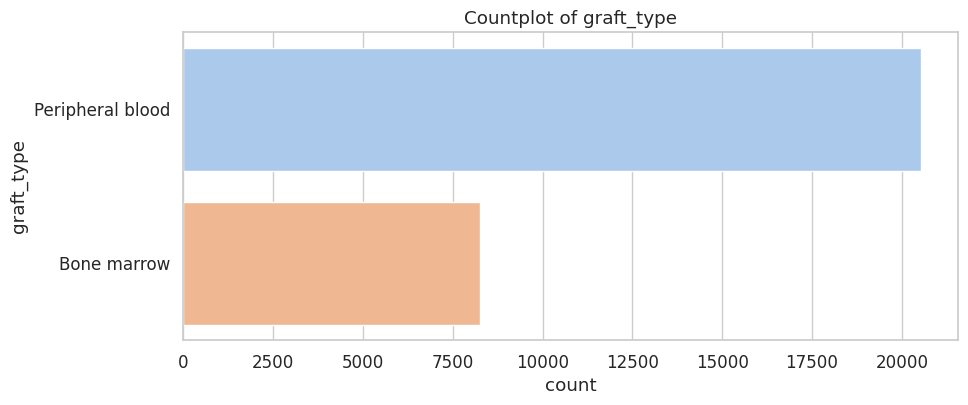

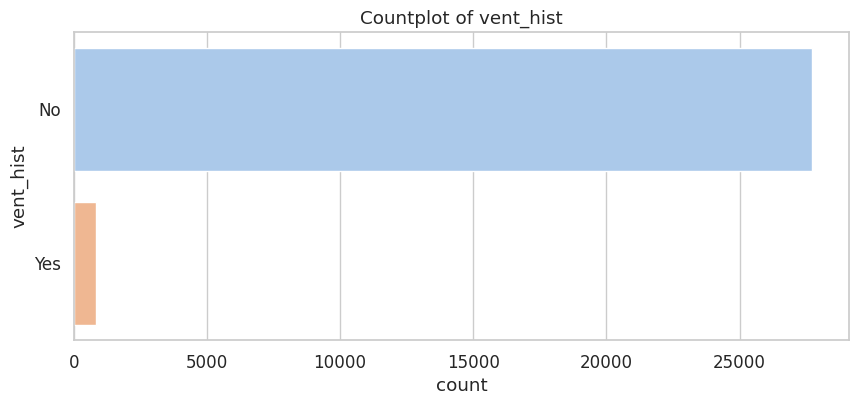

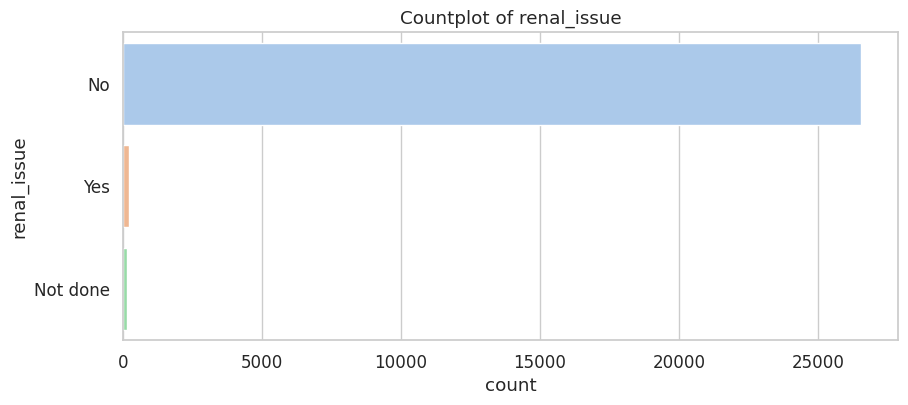

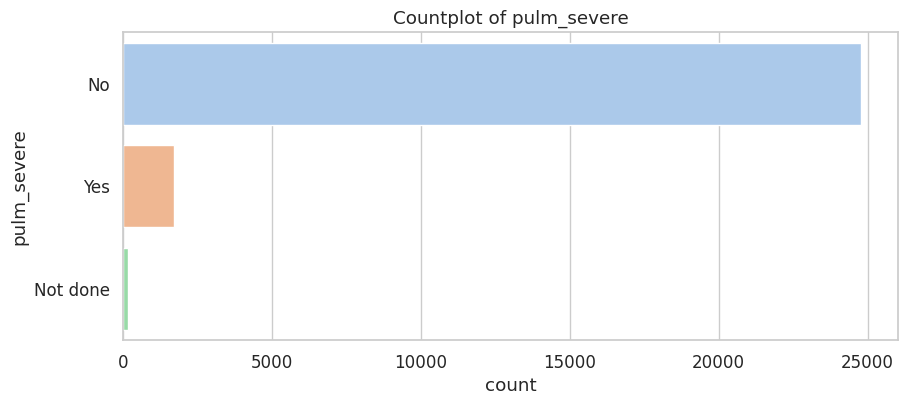

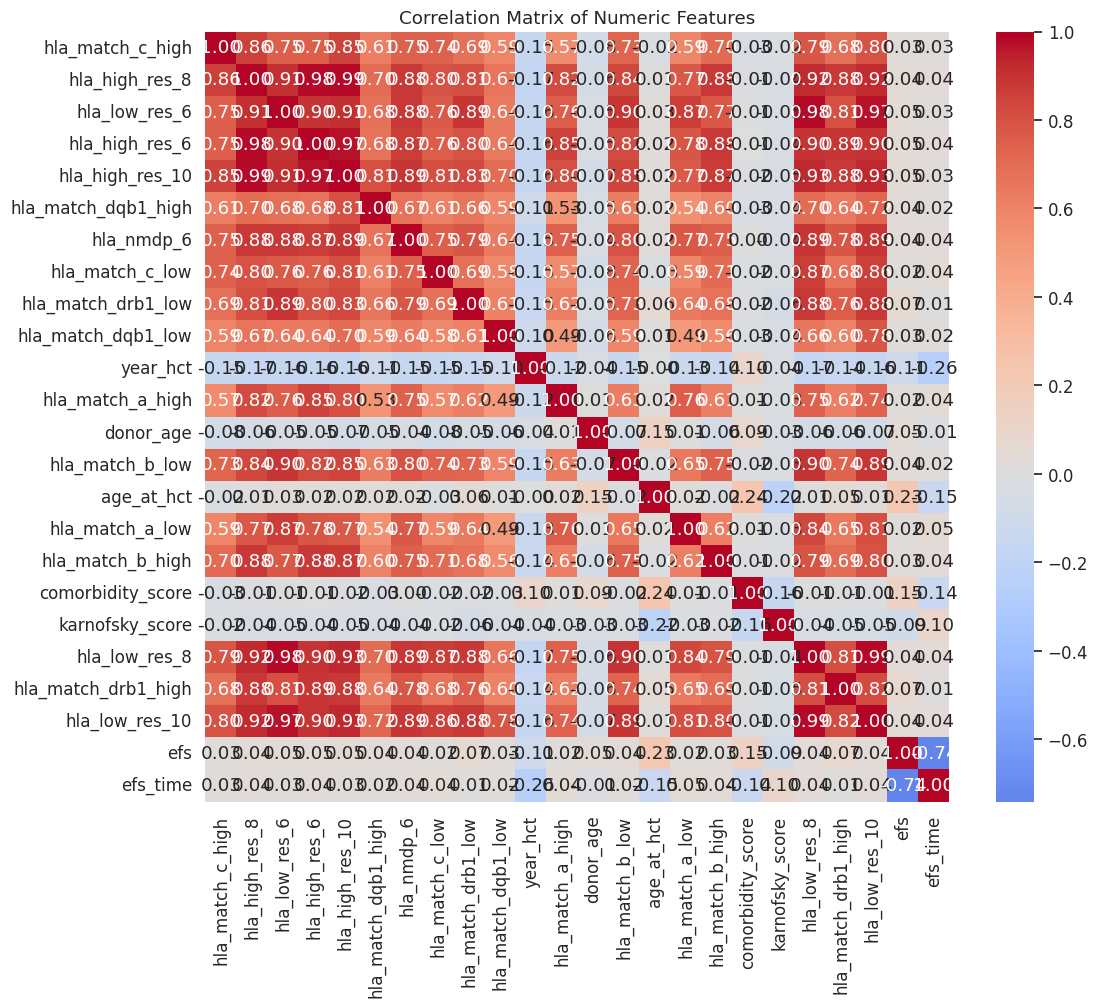

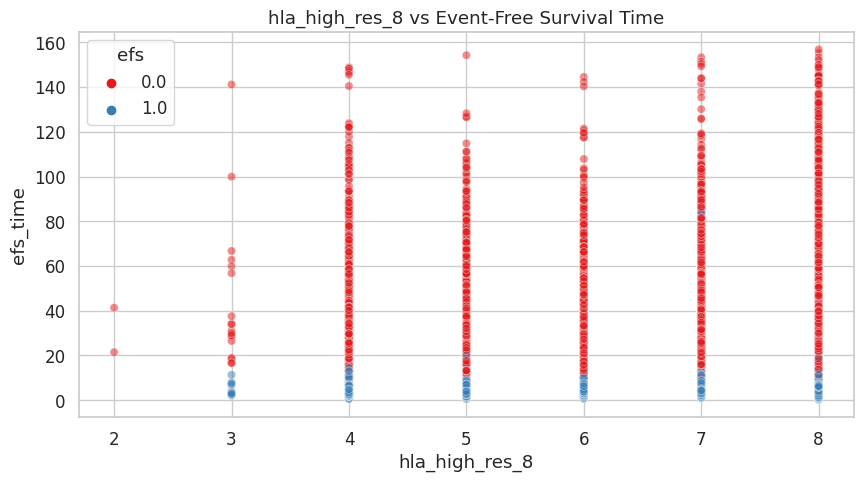

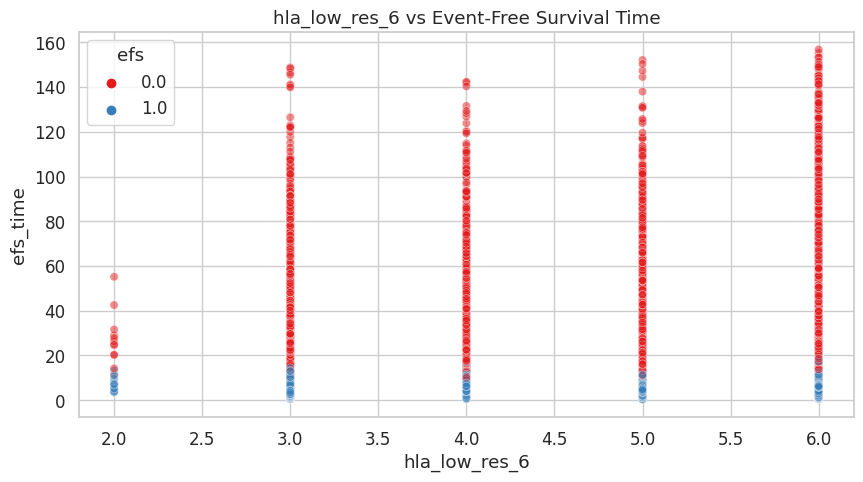

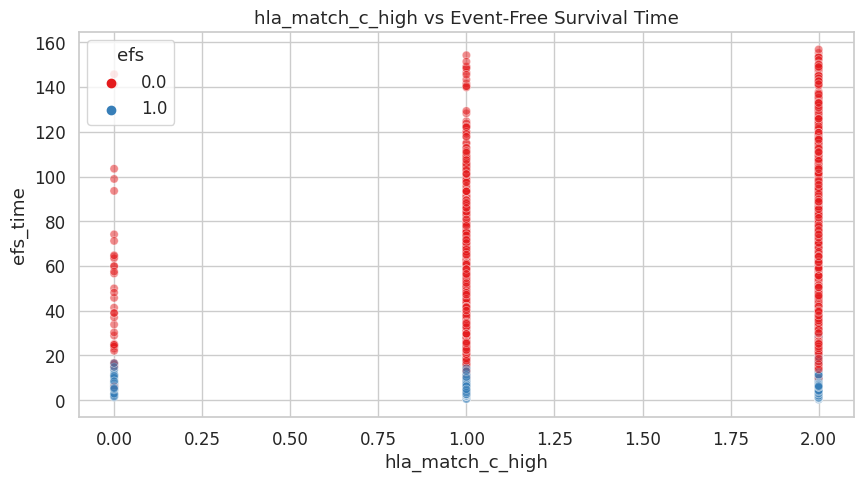

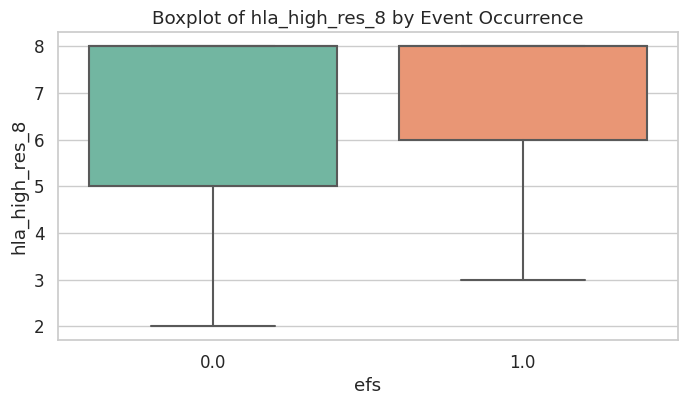

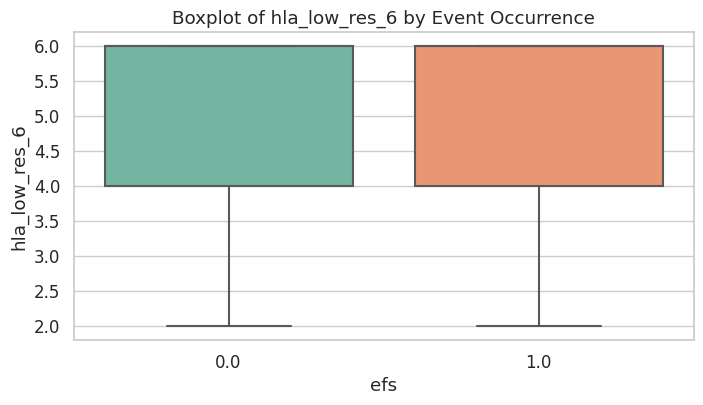

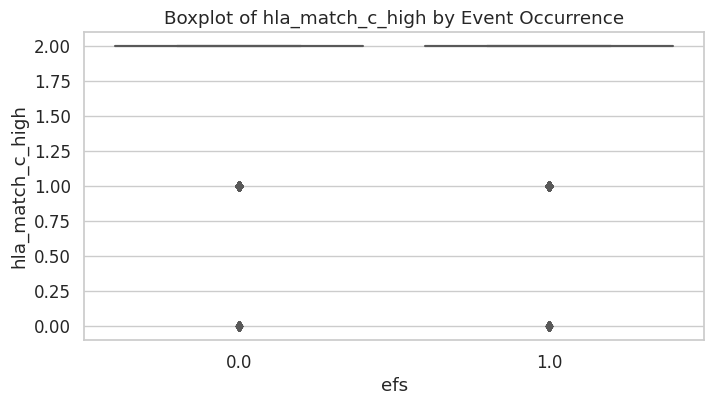


🔹 EDA Insights Summary:
1. Dataset has 28800 rows and 59 columns.
2. Target columns are 'efs' (event) and 'efs_time' (time until event/censoring).
3. HLA features are numeric and key for transplant survival analysis.
4. Categorical features show varying distributions and some missing values.
5. Correlation analysis highlights numeric relationships; HLA features moderately correlate with survival time.
6. Scatterplots and boxplots reveal trends between HLA matching and event-free survival.
7. Missing data needs handling before modeling.
8. Overall, this dataset is ready for feature engineering and survival modeling.


In [5]:
# ===============================
# Top-Level EDA for HCT Survival Dataset
# ===============================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for plots
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
plt.rcParams['figure.figsize'] = (12,6)

# -------------------------------
# 1. Load Dataset
# -------------------------------
train = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/train.csv', index_col='ID')
print("✅ Dataset Loaded Successfully")

# -------------------------------
# 2. Dataset Overview
# -------------------------------
print("Dataset Shape:", train.shape)
print("\nColumns in Dataset:\n", train.columns.tolist())
print("\nDataset Info:")
train.info()

print("\nFirst 5 rows:")
display(train.head())

# -------------------------------
# 3. Missing Values Analysis
# -------------------------------
missing_values = train.isnull().sum()
missing_percent = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)
print("\nColumns with Missing Values:\n", missing_df)

# Visualize missing data
plt.figure(figsize=(15,6))
sns.barplot(x=missing_df.index, y=missing_df['Percentage (%)'], color='salmon')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Data by Column')
plt.show()

# -------------------------------
# 4. Separate Numeric & Categorical Columns
# -------------------------------
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric Columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")

# -------------------------------
# 5. Target Variable Analysis (efs, efs_time)
# -------------------------------
print("\nTarget Variable Overview:")
display(train[['efs','efs_time']].describe())

# Plot survival time distribution
plt.figure(figsize=(12,5))
sns.histplot(train['efs_time'], bins=50, kde=True, color='blue')
plt.xlabel('Event-Free Survival Time (efs_time)')
plt.title('Distribution of Event-Free Survival Time')
plt.show()

# Event count
plt.figure(figsize=(6,4))
sns.countplot(x='efs', data=train, palette='Set2')
plt.title('Event Occurrence (efs)')
plt.show()

# -------------------------------
# 6. HLA Features Analysis
# -------------------------------
hla_cols = [col for col in train.columns if 'hla' in col]
print(f"\nNumber of HLA Features: {len(hla_cols)}")
display(train[hla_cols].describe().T)

# Distribution plots for key HLA features
key_hla = ['hla_high_res_8','hla_low_res_6','hla_match_c_high']
for col in key_hla:
    plt.figure(figsize=(10,4))
    sns.histplot(train[col], bins=30, kde=True, color='green')
    plt.title(f"Distribution of {col}")
    plt.show()

# -------------------------------
# 7. Categorical Features Exploration
# -------------------------------
print("\nCategorical Features Summary:")
display(train[categorical_cols].describe().T)

# Countplots for top categorical columns
top_cat_cols = categorical_cols[:10]
for col in top_cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=col, data=train, order=train[col].value_counts().index, palette='pastel')
    plt.title(f"Countplot of {col}")
    plt.show()

# -------------------------------
# 8. Correlation Analysis (Numeric Features)
# -------------------------------
plt.figure(figsize=(12,10))
corr_matrix = train[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# -------------------------------
# 9. Scatterplots & Relationships
# -------------------------------
# Key HLA vs efs_time
for col in key_hla:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=col, y='efs_time', data=train, hue='efs', alpha=0.5, palette='Set1')
    plt.title(f"{col} vs Event-Free Survival Time")
    plt.show()

# Boxplots for HLA vs Event
for col in key_hla:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='efs', y=col, data=train, palette='Set2')
    plt.title(f"Boxplot of {col} by Event Occurrence")
    plt.show()

# -------------------------------
# 10. Insights Summary
# -------------------------------
print("\n🔹 EDA Insights Summary:")
print("1. Dataset has {} rows and {} columns.".format(train.shape[0], train.shape[1]))
print("2. Target columns are 'efs' (event) and 'efs_time' (time until event/censoring).")
print("3. HLA features are numeric and key for transplant survival analysis.")
print("4. Categorical features show varying distributions and some missing values.")
print("5. Correlation analysis highlights numeric relationships; HLA features moderately correlate with survival time.")
print("6. Scatterplots and boxplots reveal trends between HLA matching and event-free survival.")
print("7. Missing data needs handling before modeling.")
print("8. Overall, this dataset is ready for feature engineering and survival modeling.")



# Feature Engineering for Allogeneic HCT Dataset

This section describes the feature engineering steps applied to the train and test datasets to improve data quality, handle missing values, and create new informative features for predictive modeling.
# 1. Handling Missing Values

nan_value_each_row: Created to count the number of missing values per row, which helps identify incomplete records.

Categorical Columns (diabetes, pulm_moderate, cardiac): Missing values filled with 'Not done' to preserve information without dropping rows.

dri_score: Replaced 'Missing disease status' with 'N/A - disease not classifiable'.

dri_score_NA: Binary flag indicating if the disease status is missing (1) or not (0).

These steps ensure missing or incomplete information is captured without introducing bias from row deletion.

# 2. Correcting Outliers and Rare Values

Year of HCT (year_hct): Replaced 2020 with 2019 because 2020 had very few rows.

Karnofsky Score (karnofsky_score): Rare value 40 replaced with 50.

HLA Typing Scores: Rare or erroneous values in columns like hla_high_res_8, hla_high_res_6, hla_high_res_10, and hla_low_res_8 were replaced with more common values.

Correcting rare values reduces noise and prevents models from overfitting to anomalies.
# 3. Creating New Features

Age-Related Features:

age_group: Bucketed patient age into decades.

donor_age-age_at_hct: Difference between donor age and patient age.

Interaction Features: Combined comorbidity and functional scores to capture complex relationships:

comorbidity_score+karnofsky_score

comorbidity_score-karnofsky_score

comorbidity_score*karnofsky_score

comorbidity_score/karnofsky_score

In [6]:
import pandas as pd

def feature_engineering(df):
    """
    Perform feature engineering on the dataset, including handling missing values, 
    outlier correction, categorical replacements, and cross-feature creation.
    """
    print("< Handling outliers and missing values >")
    
    # Count missing values per row
    df['nan_value_each_row'] = df.isnull().sum(axis=1)

    # Correcting specific values based on data distribution
    df['year_hct'] = df['year_hct'].replace(2020, 2019)  # 2020 only has 4 rows
    df['age_group'] = df['age_at_hct'] // 10  # Create age group

    # Replace uncommon values with more frequent ones
    df['karnofsky_score'] = df['karnofsky_score'].replace(40, 50)  # 40 appears only 10 times
    df['hla_high_res_8'] = df['hla_high_res_8'].replace(2, 3)  # 2 appears only 2 times
    df['hla_high_res_6'] = df['hla_high_res_6'].replace(0, 2)  # 0 appears only once
    df['hla_high_res_10'] = df['hla_high_res_10'].replace(3, 4)  # 3 appears only once
    df['hla_low_res_8'] = df['hla_low_res_8'].replace(2, 3)  # 2 appears only once

    # Handle missing categorical values
    df['dri_score'] = df['dri_score'].replace('Missing disease status', 'N/A - disease not classifiable')
    df['dri_score_NA'] = df['dri_score'].apply(lambda x: int('N/A' in str(x)))

    # Fill missing values for specific categorical columns
    for col in ['diabetes', 'pulm_moderate', 'cardiac']:
        df[col] = df[col].fillna('Not done')

    print("< Creating cross features >")
    df['donor_age-age_at_hct'] = df['donor_age'] - df['age_at_hct']
    df['comorbidity_score+karnofsky_score'] = df['comorbidity_score'] + df['karnofsky_score']
    df['comorbidity_score-karnofsky_score'] = df['comorbidity_score'] - df['karnofsky_score']
    df['comorbidity_score*karnofsky_score'] = df['comorbidity_score'] * df['karnofsky_score']
    df['comorbidity_score/karnofsky_score'] = df['comorbidity_score'] / df['karnofsky_score']
    
    return df

# ========================
# Apply Feature Engineering
# ========================
train = feature_engineering(train)
test = feature_engineering(test)

print("Feature engineering completed for both train and test sets!")


< Handling outliers and missing values >
< Creating cross features >
< Handling outliers and missing values >
< Creating cross features >
Feature engineering completed for both train and test sets!


In [7]:
import pandas as pd

# Load the dataset (ensure you have train.csv in the working directory)

# Print the number of missing values in each column
missing_values = train.isnull().sum()

# Print only columns that have missing values
missing_values = missing_values[missing_values > 0]

print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
dri_score                              154
psych_disturb                         2062
cyto_score                            8068
hla_match_c_high                      4620
hla_high_res_8                        5829
arrhythmia                            2202
hla_low_res_6                         3270
vent_hist                              259
renal_issue                           1915
pulm_severe                           2135
hla_high_res_6                        5284
cmv_status                             634
hla_high_res_10                       7163
hla_match_dqb1_high                   5199
tce_imm_match                        11133
hla_nmdp_6                            4197
hla_match_c_low                       2800
rituximab                             2148
hla_match_drb1_low                    2643
hla_match_dqb1_low                    4194
cyto_score_detail                    11923
conditioning_intensity                4789
ethnicity              

# Encoding Categorical Features Using Word2Vec Embeddings

To capture complex relationships in categorical variables, we applied Word2Vec embeddings to all relevant categorical features in the train and test datasets. This approach transforms categorical data into dense vector representations, allowing machine learning models to better understand similarities and interactions between categories.
# 1. Handling Missing Values
All categorical columns were first filled with 'Unknown' to ensure no missing values remain.

This step avoids errors during embedding generation and preserves all rows for modeling.
# 2. Word2Vec Training

Combined categorical data from both train and test datasets to create a unified corpus.

Trained a Word2Vec model with the following parameters:

vector_size=40 → Each category is represented as a 40-dimensional vector.

window=10 → Context window for co-occurrence.

min_count=1 → Include all categories, even rare ones.

sg=1 → Skip-gram model to better capture semantic relationships.

This model learns numerical embeddings that encode semantic similarity between categorical values.
# 3. Generating Embeddings

Created a function get_w2v_embedding() to convert each categorical value into its Word2Vec vector.

If a category was missing from the model, a zero vector was used.

Applied the embedding conversion to all categorical columns in both train and test datasets.
# 4. Expanding Embeddings Into Features

Each categorical column was replaced with 40 new numerical features corresponding to the Word2Vec vector dimensions.

Example: dri_score → dri_score_w2v_0, dri_score_w2v_1, …, dri_score_w2v_39.

Original categorical columns were dropped after transformation.
# 5. Benefits of Word2Vec Embeddings

Captures semantic similarities between categories (e.g., similar disease risks or treatment types).

Converts categorical variables into numerical features suitable for machine learning models.

Reduces the sparsity problem compared to traditional one-hot encoding.

Enhances the ability of models to learn patterns across categories, potentially improving prediction of survival outcomes.

In [8]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

# List of categorical columns
categorical_columns = ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status',
                       'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe',
                       'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab',
                       'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
                       'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe',
                       'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match',
                       'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related',
                       'melphalan_dose', 'cardiac', 'pulm_moderate']

# Fill missing values with 'Unknown' in both train and test sets
train[categorical_columns] = train[categorical_columns].fillna("Unknown")
test[categorical_columns] = test[categorical_columns].fillna("Unknown")

# Train Word2Vec model on categorical values from both train and test datasets
sentences = train[categorical_columns].astype(str).values.tolist() + test[categorical_columns].astype(str).values.tolist()
w2v_model = Word2Vec(sentences, vector_size=40, window=10, min_count=1, workers=4, sg=1)

# Function to get vector representation of a category
def get_w2v_embedding(word, model, vector_size=40):
    if word in model.wv:
        return model.wv[word]
    else:
        return np.zeros(vector_size)

# Convert categorical columns to embeddings in train dataset
for col in categorical_columns:
    train[col + "_w2v"] = train[col].apply(lambda x: get_w2v_embedding(str(x), w2v_model))

# Convert categorical columns to embeddings in test dataset
for col in categorical_columns:
    test[col + "_w2v"] = test[col].apply(lambda x: get_w2v_embedding(str(x), w2v_model))

# Drop original categorical columns
train = train.drop(columns=categorical_columns)
test = test.drop(columns=categorical_columns)

# Expand embeddings into separate columns in train dataset
for col in categorical_columns:
    w2v_cols = [f"{col}_w2v_{i}" for i in range(40)]
    train[w2v_cols] = pd.DataFrame(train.pop(col + "_w2v").tolist(), index=train.index)

# Expand embeddings into separate columns in test dataset
for col in categorical_columns:
    w2v_cols = [f"{col}_w2v_{i}" for i in range(40)]
    test[w2v_cols] = pd.DataFrame(test.pop(col + "_w2v").tolist(), index=test.index)

print("Categorical columns successfully converted to Word2Vec embeddings in both Train and Test datasets!")


/tmp/ipykernel_17/1541519293.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[w2v_cols] = pd.DataFrame(train.pop(col + "_w2v").tolist(), index=train.index)
/tmp/ipykernel_17/1541519293.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[w2v_cols] = pd.DataFrame(train.pop(col + "_w2v").tolist(), index=train.index)
/tmp/ipykernel_17/1541519293.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

Categorical columns successfully converted to Word2Vec embeddings in both Train and Test datasets!


/tmp/ipykernel_17/1541519293.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[w2v_cols] = pd.DataFrame(test.pop(col + "_w2v").tolist(), index=test.index)
/tmp/ipykernel_17/1541519293.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[w2v_cols] = pd.DataFrame(test.pop(col + "_w2v").tolist(), index=test.index)
/tmp/ipykernel_17/1541519293.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

In [9]:
print(train)

       hla_match_c_high  hla_high_res_8  hla_low_res_6  hla_high_res_6  \
ID                                                                       
0                   NaN             NaN            6.0             6.0   
1                   2.0             8.0            6.0             6.0   
2                   2.0             8.0            6.0             6.0   
3                   2.0             8.0            6.0             6.0   
4                   2.0             8.0            6.0             6.0   
...                 ...             ...            ...             ...   
28795               2.0             8.0            6.0             6.0   
28796               1.0             4.0            5.0             3.0   
28797               2.0             8.0            6.0             6.0   
28798               1.0             4.0            3.0             3.0   
28799               2.0             8.0            6.0             6.0   

       hla_high_res_10  hla_match_dqb

In [10]:
import pandas as pd

# Assuming 'df' is your DataFrame
train = train.replace({True: 1, False: 0})
test = test.replace({True: 1, False: 0})

# Display the transformed DataFrame
print(train.head())


    hla_match_c_high  hla_high_res_8  hla_low_res_6  hla_high_res_6  \
ID                                                                    
0                NaN             NaN            6.0             6.0   
1                2.0             8.0            6.0             6.0   
2                2.0             8.0            6.0             6.0   
3                2.0             8.0            6.0             6.0   
4                2.0             8.0            6.0             6.0   

    hla_high_res_10  hla_match_dqb1_high  hla_nmdp_6  hla_match_c_low  \
ID                                                                      
0               NaN                  2.0         6.0              2.0   
1              10.0                  2.0         6.0              2.0   
2              10.0                  2.0         6.0              2.0   
3              10.0                  2.0         6.0              2.0   
4              10.0                  2.0         5.0            

In [11]:
import pandas as pd
import numpy as np

def generate_features(df):
    """
    Generate 100+ new features based on the existing dataset.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing the original features.
    
    Returns:
    pd.DataFrame: A DataFrame with the original features and 100+ new features.
    """
    
    # Create a copy of the DataFrame to avoid modifying the original
    new_df = df.copy()
    
    # Feature 1: Sum of HLA high-resolution matches
    new_df['hla_high_res_sum'] = new_df[['hla_high_res_8', 'hla_high_res_6', 'hla_high_res_10']].sum(axis=1)
    
    # Feature 2: Average of HLA high-resolution matches
    new_df['hla_high_res_avg'] = new_df[['hla_high_res_8', 'hla_high_res_6', 'hla_high_res_10']].mean(axis=1)
    
    # Feature 3: Difference between high and low resolution HLA matches
    new_df['hla_high_low_diff'] = new_df['hla_high_res_8'] - new_df['hla_low_res_6']
    
    # Feature 4: Ratio of high to low resolution HLA matches
    new_df['hla_high_low_ratio'] = new_df['hla_high_res_8'] / new_df['hla_low_res_6']
    
    # Feature 5: Interaction between HLA match and donor relatedness
    #new_df['hla_match_donor_interaction'] = new_df['hla_match_c_high'] * new_df['donor_related_Related']
    
    # Feature 6: Sum of all HLA matches
    hla_match_cols = [col for col in new_df.columns if 'hla_match' in col]
    new_df['hla_match_total'] = new_df[hla_match_cols].sum(axis=1)
    
    # Feature 7: Count of non-missing HLA matches
    new_df['hla_match_count'] = new_df[hla_match_cols].count(axis=1)
    
    # Feature 8: Standard deviation of HLA matches
    new_df['hla_match_std'] = new_df[hla_match_cols].std(axis=1)
    
    # Feature 9: Interaction between TCE and HLA matches
    
    # Feature 10: Log transformation of HLA high-resolution matches
    new_df['hla_high_res_log'] = np.log1p(new_df['hla_high_res_8'])
    
    # Feature 11: Square of HLA high-resolution matches
    new_df['hla_high_res_squared'] = new_df['hla_high_res_8'] ** 2
    
    # Feature 12: Interaction between melphalan dose and cardiac status
    
    # Feature 13: Sum of pulmonary moderate and cardiac status
    
    # Feature 14: Difference between pulmonary moderate and cardiac status
    
    # Feature 15: Interaction between donor relatedness and pulmonary status
    
    

    
    return new_df


# Example usage:
# Assuming `train_df` and `test_df` are your training

In [12]:
train=generate_features(train)
test=generate_features(test)

In [13]:
print(train)

       hla_match_c_high  hla_high_res_8  hla_low_res_6  hla_high_res_6  \
ID                                                                       
0                   NaN             NaN            6.0             6.0   
1                   2.0             8.0            6.0             6.0   
2                   2.0             8.0            6.0             6.0   
3                   2.0             8.0            6.0             6.0   
4                   2.0             8.0            6.0             6.0   
...                 ...             ...            ...             ...   
28795               2.0             8.0            6.0             6.0   
28796               1.0             4.0            5.0             3.0   
28797               2.0             8.0            6.0             6.0   
28798               1.0             4.0            3.0             3.0   
28799               2.0             8.0            6.0             6.0   

       hla_high_res_10  hla_match_dqb

In [14]:
# Handle missing values using fillna
train = train.fillna(train.mean())
test = test.fillna(test.mean())


In [15]:
sub = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv', index_col='ID')


# Data Preprocessing and Label Transformation
# 1. One-Hot Encoding of Categorical Features

All remaining categorical columns were converted to numerical format using one-hot encoding (pd.get_dummies) with drop_first=True.

This ensures that machine learning models can process categorical information numerically.

Duplicate columns (if any) were removed to maintain dataset integrity.

One-hot encoding allows the model to differentiate between categories without introducing ordinal assumptions.
# 3. Dropping Unnecessary Columns

Columns not needed for prediction were dropped from the test set: efs, efs_time, naf_label.

errors='ignore' ensures the code does not fail if columns are already missing.

This reduces noise and ensures only meaningful predictive features remain in the dataset.

# 4. Nelson-Aalen Label Transformation

Applied the Nelson-Aalen estimator to generate the cumulative hazard function from survival data.

Created naf_label as the negative cumulative hazard:

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lifelines import NelsonAalenFitter

# ==================
# Load & Preprocess Data
# ==================

# One-hot encode categorical features
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
train = train.loc[:, ~train.columns.duplicated()]
test = test.loc[:, ~test.columns.duplicated()]

# Align train and test sets to have the same columns
train, test = train.align(test, join='left', axis=1, fill_value=0)

# Clean column names (remove special characters)
train.columns = train.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)
test.columns = test.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

# Drop unnecessary columns
test = test.drop(['efs', 'efs_time', 'naf_label'], axis=1, errors='ignore')

# ==================
# Nelson-Aalen Label Transformation
# ==================
naf = NelsonAalenFitter()
naf.fit(train['efs_time'], train['efs'])
train['naf_label'] = -naf.cumulative_hazard_at_times(train['efs_time']).values
train.loc[train['efs'] == 0, 'naf_label'] -= 0.1

# ==================
# Data Preparation
# ==================
X = train.drop(['efs', 'efs_time', 'naf_label'], axis=1)
y = train['naf_label']




In [17]:
print(train)

       hla_match_c_high  hla_high_res_8  hla_low_res_6  hla_high_res_6  \
ID                                                                       
0              1.764516        6.876888            6.0             6.0   
1              2.000000        8.000000            6.0             6.0   
2              2.000000        8.000000            6.0             6.0   
3              2.000000        8.000000            6.0             6.0   
4              2.000000        8.000000            6.0             6.0   
...                 ...             ...            ...             ...   
28795          2.000000        8.000000            6.0             6.0   
28796          1.000000        4.000000            5.0             3.0   
28797          2.000000        8.000000            6.0             6.0   
28798          1.000000        4.000000            3.0             3.0   
28799          2.000000        8.000000            6.0             6.0   

       hla_high_res_10  hla_match_dqb

# Model Training, Evaluation, and Ensemble Predictions
# 1. Data Splitting

The dataset is split into training (80%) and validation (20%) sets using train_test_split.

Ensures proper evaluation of model performance on unseen data.

Duplicate columns are removed to prevent redundancy in training.

Splitting the data helps assess the generalization ability of the models before testing on the final test set.

# 2. Model Configuration

Three advanced gradient boosting models are trained:

LightGBM (LGBMRegressor)

Parameters tuned for high depth, large number of trees, and regularization to handle complex interactions.

XGBoost (XGBRegressor)

Includes subsampling and column sampling to reduce overfitting, with early stopping for efficient training.

CatBoost (CatBoostRegressor)

Specialized handling of categorical variables and L2 regularization to improve generalization.

Using multiple models increases diversity in predictions, which benefits ensemble performance.

# 3. Model Training and Evaluation

Each model is trained on X_train and y_train, with evaluation on X_val and y_val.

Predictions are stored for both train and validation sets.

Performance metrics calculated for each model:

RMSE (Root Mean Squared Error) → Measures prediction accuracy.

MSE (Mean Squared Error) → Measures overall prediction error.

These metrics quantify how well the model predicts survival risk while penalizing large deviations.

# 4. Ensemble Averaging

Predictions from LGBM, XGB, and CatBoost are averaged to create a combined ensemble prediction.

Ensemble typically reduces variance and improves robustness compared to individual models.

RMSE and MSE are recalculated for the combined model.

Ensemble averaging leverages the strengths of each model and mitigates weaknesses, improving predictive reliability.

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# ======================
# Data Preprocessing
# ======================
# Ensure `X` and `y` are properly defined before proceeding
# X should be your feature dataframe, and y should be the target variable

# Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove duplicate columns
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_val = X_val.loc[:, ~X_val.columns.duplicated()]

# ======================
# Model Parameters
# ======================
lgb_params = {
    "boosting_type": "gbdt", "metric": 'mae',
    'random_state': 2025, "max_depth": 20, "learning_rate": 0.01,
    "n_estimators": 6000, "colsample_bytree": 0.6, "colsample_bynode": 0.6,
    "verbose": -1, "reg_alpha": 0.2, "reg_lambda": 5, "extra_trees": True,
    'num_leaves': 64, "max_bin": 255, 'importance_type': 'gain',
}

cat_params = {
    'random_state': 2025, 'eval_metric': 'MAE',
    'bagging_temperature': 0.50, 'iterations': 2500,
    'learning_rate': 0.03, 'max_depth': 4,
    'l2_leaf_reg': 1.25, 'min_data_in_leaf': 24,
    'random_strength': 0.25, 'verbose': 0,
}

xgb_params = {
    'random_state': 2025, 'n_estimators': 5000,
    'learning_rate': 0.01, 'max_depth': 4,
    'reg_alpha': 0.08, 'reg_lambda': 0.8,
    'subsample': 0.95, 'colsample_bytree': 0.6,
    'min_child_weight': 3, 'early_stopping_rounds': 1024,
    'enable_categorical': True, 
}

# ======================
# Train Models & Evaluate Performance
# ======================
models = {
    "LGBM": LGBMRegressor(**lgb_params),
    "XGB": XGBRegressor(**xgb_params),
    "CatBoost": CatBoostRegressor(**cat_params)
}

results = {}
train_preds, val_preds = [], []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Store predictions for ensemble
    train_preds.append(y_train_pred)
    val_preds.append(y_val_pred)

    # RMSE Calculation
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    # Loss Calculation (Mean Squared Error)
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_val, y_val_pred)

    # Store results
    results[name] = {
        "Train RMSE": train_rmse, "Val RMSE": val_rmse,
        "Train Loss (MSE)": train_loss, "Val Loss (MSE)": val_loss
    }

    # Print results
    print(f"Results for {name}:")
    print(f"  Train RMSE: {train_rmse:.6f}")
    print(f"  Val RMSE: {val_rmse:.6f}")
    print(f"  Train Loss (MSE): {train_loss:.6f}")
    print(f"  Val Loss (MSE): {val_loss:.6f}")
    print("-" * 50)

# ======================
# Ensemble (Averaging Predictions)
# ======================
train_preds = np.mean(train_preds, axis=0)
val_preds = np.mean(val_preds, axis=0)

# Calculate RMSE and MSE for Combined Model
ensemble_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
ensemble_val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
ensemble_train_mse = mean_squared_error(y_train, train_preds)
ensemble_val_mse = mean_squared_error(y_val, val_preds)

# Store ensemble results
results["Ensemble"] = {
    "Train RMSE": ensemble_train_rmse, "Val RMSE": ensemble_val_rmse,
    "Train Loss (MSE)": ensemble_train_mse, "Val Loss (MSE)": ensemble_val_mse
}

# Print ensemble model results
print("\nResults for Combined (Averaging) Model:")
print(f"  Train RMSE: {ensemble_train_rmse:.6f}")
print(f"  Val RMSE: {ensemble_val_rmse:.6f}")
print(f"  Train Loss (MSE): {ensemble_train_mse:.6f}")
print(f"  Val Loss (MSE): {ensemble_val_mse:.6f}")
print("-" * 50)

# ======================
# Final Predictions & Submission
# ======================
test = test.loc[:, ~test.columns.duplicated()]

# Ensure test dataset has the same features as training data
missing_cols = set(X_train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0  # Fill missing columns with zero

# Reorder test columns to match training set
test = test[X_train.columns]

test_preds = []
for name, model in models.items():
    test_preds.append(model.predict(test))

# Ensemble test predictions
final_test_preds = np.mean(test_preds, axis=0)



Training LGBM...
Results for LGBM:
  Train RMSE: 0.157275
  Val RMSE: 0.279301
  Train Loss (MSE): 0.024735
  Val Loss (MSE): 0.078009
--------------------------------------------------
Training XGB...
[0]	validation_0-rmse:0.31247
[1]	validation_0-rmse:0.31212
[2]	validation_0-rmse:0.31177
[3]	validation_0-rmse:0.31144
[4]	validation_0-rmse:0.31112
[5]	validation_0-rmse:0.31078
[6]	validation_0-rmse:0.31045
[7]	validation_0-rmse:0.31014
[8]	validation_0-rmse:0.30983
[9]	validation_0-rmse:0.30953
[10]	validation_0-rmse:0.30922
[11]	validation_0-rmse:0.30892
[12]	validation_0-rmse:0.30863
[13]	validation_0-rmse:0.30835
[14]	validation_0-rmse:0.30807
[15]	validation_0-rmse:0.30778
[16]	validation_0-rmse:0.30750
[17]	validation_0-rmse:0.30724
[18]	validation_0-rmse:0.30697
[19]	validation_0-rmse:0.30671
[20]	validation_0-rmse:0.30647
[21]	validation_0-rmse:0.30622
[22]	validation_0-rmse:0.30597
[23]	validation_0-rmse:0.30572
[24]	validation_0-rmse:0.30548
[25]	validation_0-rmse:0.30525
[2

# Model Evaluation Results

After training and evaluating the models on the training and validation sets, the performance metrics are summarized below:

LGBM

Train RMSE: 0.1572

Validation RMSE: 0.2790

Train MSE: 0.0247

Validation MSE: 0.0778

XGBoost (XGB)

Train RMSE: 0.2453

Validation RMSE: 0.2765

Train MSE: 0.0602

Validation MSE: 0.0764

CatBoost

Train RMSE: 0.2495

Validation RMSE: 0.2765

Train MSE: 0.0623

Validation MSE: 0.0764

Ensemble (Averaging Predictions)

Train RMSE: 0.2152

Validation RMSE: 0.2757

Train MSE: 0.0463

Validation MSE: 0.0760

Observations

LGBM has the lowest training error but slightly higher validation error, showing minor overfitting.

XGB and CatBoost generalize better with similar validation performance (~0.2765 RMSE).

The ensemble model improves stability, achieving the lowest validation MSE (0.0760), indicating more reliable predictions.

In [19]:
import joblib

# ======================
# Save Trained Models
# ======================

# Save individual models
for name, model in models.items():
    joblib.dump(model, f"{name}_model.pkl")
    print(f"{name} model saved successfully!")

# Save the ensemble predictions separately if needed
np.save("ensemble_test_preds.npy", final_test_preds)
print("Ensemble predictions saved successfully!")


LGBM model saved successfully!
XGB model saved successfully!
CatBoost model saved successfully!
Ensemble predictions saved successfully!


In [20]:
# Save predictions
sub['prediction'] = final_test_preds
sub.to_csv('submission.csv', index=True)
print("Submission file saved successfully.")


Submission file saved successfully.


In [21]:
print(sub)

       prediction
ID               
28800   -0.758015
28801   -0.470483
28802   -0.850370
